In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import RobustScaler

## Training a SARIMA model on the whole data, predicting the level from 2021-12-11 to 2021-12-18

In [11]:
df_original = pd.read_csv('data/Kaub_Level_Since_2013_updated_v2.csv')
path = 'results/' # Used for saving figures later on

In [12]:
df = df_original

In [13]:
print(len(df))

3266


In [14]:
df.tail()

,date,level
3261,2021-12-06,191
3262,2021-12-07,245
3263,2021-12-08,228
3264,2021-12-09,202
3265,2021-12-10,197


In [15]:
df.index = pd.period_range('2013-01-01', '2021-12-10', freq='D')

In [16]:
df = df.drop('date', axis=1)

In [17]:
df

,level
2013-01-01,510
2013-01-02,461
2013-01-03,414
2013-01-04,378
2013-01-05,351
...,...
2021-12-06,191
2021-12-07,245
2021-12-08,228
2021-12-09,202


In [18]:
scaler = RobustScaler().fit(df.values)
df['level'] = scaler.transform(df)

/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [19]:
auto_arima(df['level'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-5593.304, Time=5.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-2867.446, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-4913.399, Time=1.53 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-5054.044, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-2869.353, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=-5599.707, Time=5.30 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=-5601.812, Time=2.41 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=-5602.287, Time=4.62 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=-5603.590, Time=26.28 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=-5592.503, Time=28.81 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=-5556.088, Time=4.23 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=-5577.890, Time=13.87 sec
 ARIMA(3,1,2)(2,0,0)[7] intercept   : AIC=-5617.323, Time=19.56 sec
 ARIMA(3,1,2)(1,0,0)[7] intercept   : AIC=-5618.715, Time=4.35 sec
 ARIMA(3,1,2)(0

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [20]:
my_order = (3, 0, 1)
my_seasonal_order = (1, 0, 2, 7)
model = SARIMAX(df['level'], order=my_order, seasonal_order=my_seasonal_order, enforce_stationarity=True)
model_fit = model.fit(maxiter=200)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91993D-01    |proj g|=  9.10576D+00


/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f= -6.28455D-01    |proj g|=  3.99331D+00

At iterate   10    f= -8.14725D-01    |proj g|=  2.61280D-01

At iterate   15    f= -8.27754D-01    |proj g|=  1.88384D-01

At iterate   20    f= -8.29795D-01    |proj g|=  5.98939D-02

At iterate   25    f= -8.41976D-01    |proj g|=  9.71043D-01

At iterate   30    f= -8.60030D-01    |proj g|=  6.57673D-02

At iterate   35    f= -8.63553D-01    |proj g|=  1.03409D-02

At iterate   40    f= -8.64923D-01    |proj g|=  2.41340D-01

At iterate   45    f= -8.65594D-01    |proj g|=  9.82810D-03

At iterate   50    f= -8.65596D-01    |proj g|=  3.53515D-03

At iterate   55    f= -8.65596D-01    |proj g|=  6.98981D-04

At iterate   60    f= -8.65597D-01    |proj g|=  6.89915D-04

At iterate   65    f= -8.65599D-01    |proj g|=  2.22753D-03

At iterate   70    f= -8.65605D-01    |proj g|=  6.17505D-03

At iterate   75    f= -8.65606D-01    |proj g|=  5.85987D-03

At iterate   80    f= -8.65607D-01    |proj g|=  2.88672D-04

       

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  level   No. Observations:                 3266
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2], 7)   Log Likelihood                2827.072
Date:                                Tue, 14 Dec 2021   AIC                          -5638.144
Time:                                        11:18:03   BIC                          -5589.413
Sample:                                    01-01-2013   HQIC                         -5620.691
                                         - 12-10-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6818      0.031     53.834      0.000       1.621       1.743
ar.L2         -0.9120      0.057    -16.026      0.000      -1.024      -0.800
ar.L3          0.2072      0.028      7.507      0.000       0.153       0.261
ma.L1          0.3125      0.032      9.746      0.000       0.250       0.375
ar.S.L7        0.6536      0.225      2.902      0.004       0.212       1.095
ma.S.L7       -0.6553      0.223     -2.936      0.003      -1.093      -0.218
ma.S.L14       0.0363      0.020      1.785      0.074      -0.004       0.076
sigma2         0.0103   9.79e-05    105.735      0.000       0.010       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             22814.93
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.29
Prob(H) (two-sided):                  0.28   Kurtosis:                        15.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model_fit.forecast(steps=7)

2021-12-11    0.124152
2021-12-12    0.147023
2021-12-13    0.150586
2021-12-14    0.143164
2021-12-15    0.134672
2021-12-16    0.130892
2021-12-17    0.123714
Freq: D, Name: predicted_mean, dtype: float64

In [23]:
model_fit.mae

0.06388599425068246

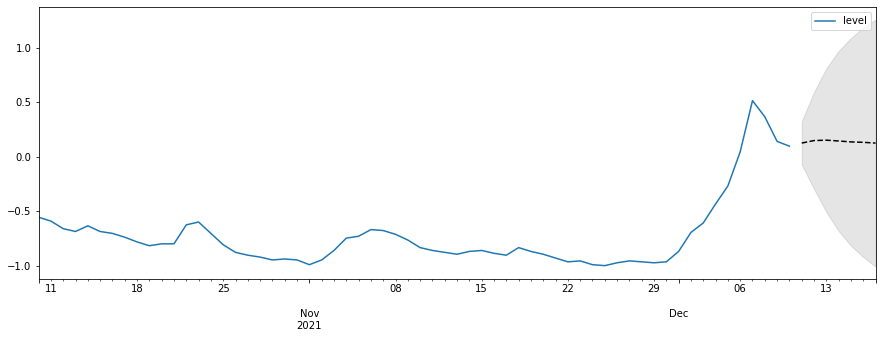

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))

df.loc['2021-10-10':].plot(ax=ax)

fcast = model_fit.get_forecast(steps=7).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Comparing a SARIMA model that uses similar data as the LSTM model

In [25]:
df_original

,date,level
2013-01-01,2013-01-01,510
2013-01-02,2013-01-02,461
2013-01-03,2013-01-03,414
2013-01-04,2013-01-04,378
2013-01-05,2013-01-05,351
...,...,...
2021-12-06,2021-12-06,191
2021-12-07,2021-12-07,245
2021-12-08,2021-12-08,228
2021-12-09,2021-12-09,202


In [28]:
df_original = df_original.drop('date', axis=1)

In [32]:
train_df = df_original[:int(len(df_original)*0.9)]
test_df = df_original[int(0.9*len(df_original)):]

In [33]:
assert(len(train_df) + len(test_df) == len(df))

In [34]:
print(len(train_df), len(test_df))

2939 327


In [38]:
scaler = RobustScaler().fit(train_df.values)
train_scaled = scaler.transform(train_df)
test_scaled = scaler.transform(test_df)

/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [39]:
train_df = pd.DataFrame(train_scaled, index=train_df.index, columns=train_df.columns)
test_df = pd.DataFrame(test_scaled, index=test_df.index, columns=test_df.columns)

In [40]:
y_order = (3, 0, 1)
my_seasonal_order = (1, 0, 2, 7)
model = SARIMAX(train_df['level'], order=my_order, seasonal_order=my_seasonal_order, enforce_stationarity=True)
model_fit = model.fit(maxiter=200)

/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21669D-01    |proj g|=  8.99789D+00

At iterate    5    f= -5.72764D-01    |proj g|=  4.86074D-01

At iterate   10    f= -7.61445D-01    |proj g|=  1.08125D-01

At iterate   15    f= -7.84901D-01    |proj g|=  2.36213D-01

At iterate   20    f= -8.10729D-01    |proj g|=  5.84806D-02

At iterate   25    f= -8.11068D-01    |proj g|=  8.11956D-02

At iterate   30    f= -8.13254D-01    |proj g|=  1.00261D-02

At iterate   35    f= -8.13266D-01    |proj g|=  1.38654D-04

At iterate   40    f= -8.13268D-01    |proj g|=  2.86947D-03

At iterate   45    f= -8.13274D-01    |proj g|=  7.09688D-04

At iterate   50    f= -8.13275D-01    |proj g|=  7.08983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [60]:
train_df.tail()

,level
2021-01-13,-0.639269
2021-01-14,-0.611872
2021-01-15,-0.593607
2021-01-16,-0.045662
2021-01-17,0.429224


In [82]:
yhats = model_fit.get_forecast(steps=7)

In [83]:
def mae(yhats, y):
    total_mae = 0
    for predictions, truth in zip(yhats, y):
        print(truth)
        total_mae += abs(predictions-float(truth))
    return total_mae / len(yhats)


In [85]:
mean_absolute_error = mae(yhats, test_df['level'][:7])

0.30136986301369867
0.10958904109589042
0.03652968036529681
-0.009132420091324202
0.05479452054794521
0.3835616438356165
0.8310502283105023


In [86]:
mean_absolute_error

0.4014415957529313